2240


<function matplotlib.pyplot.show(close=None, block=None)>

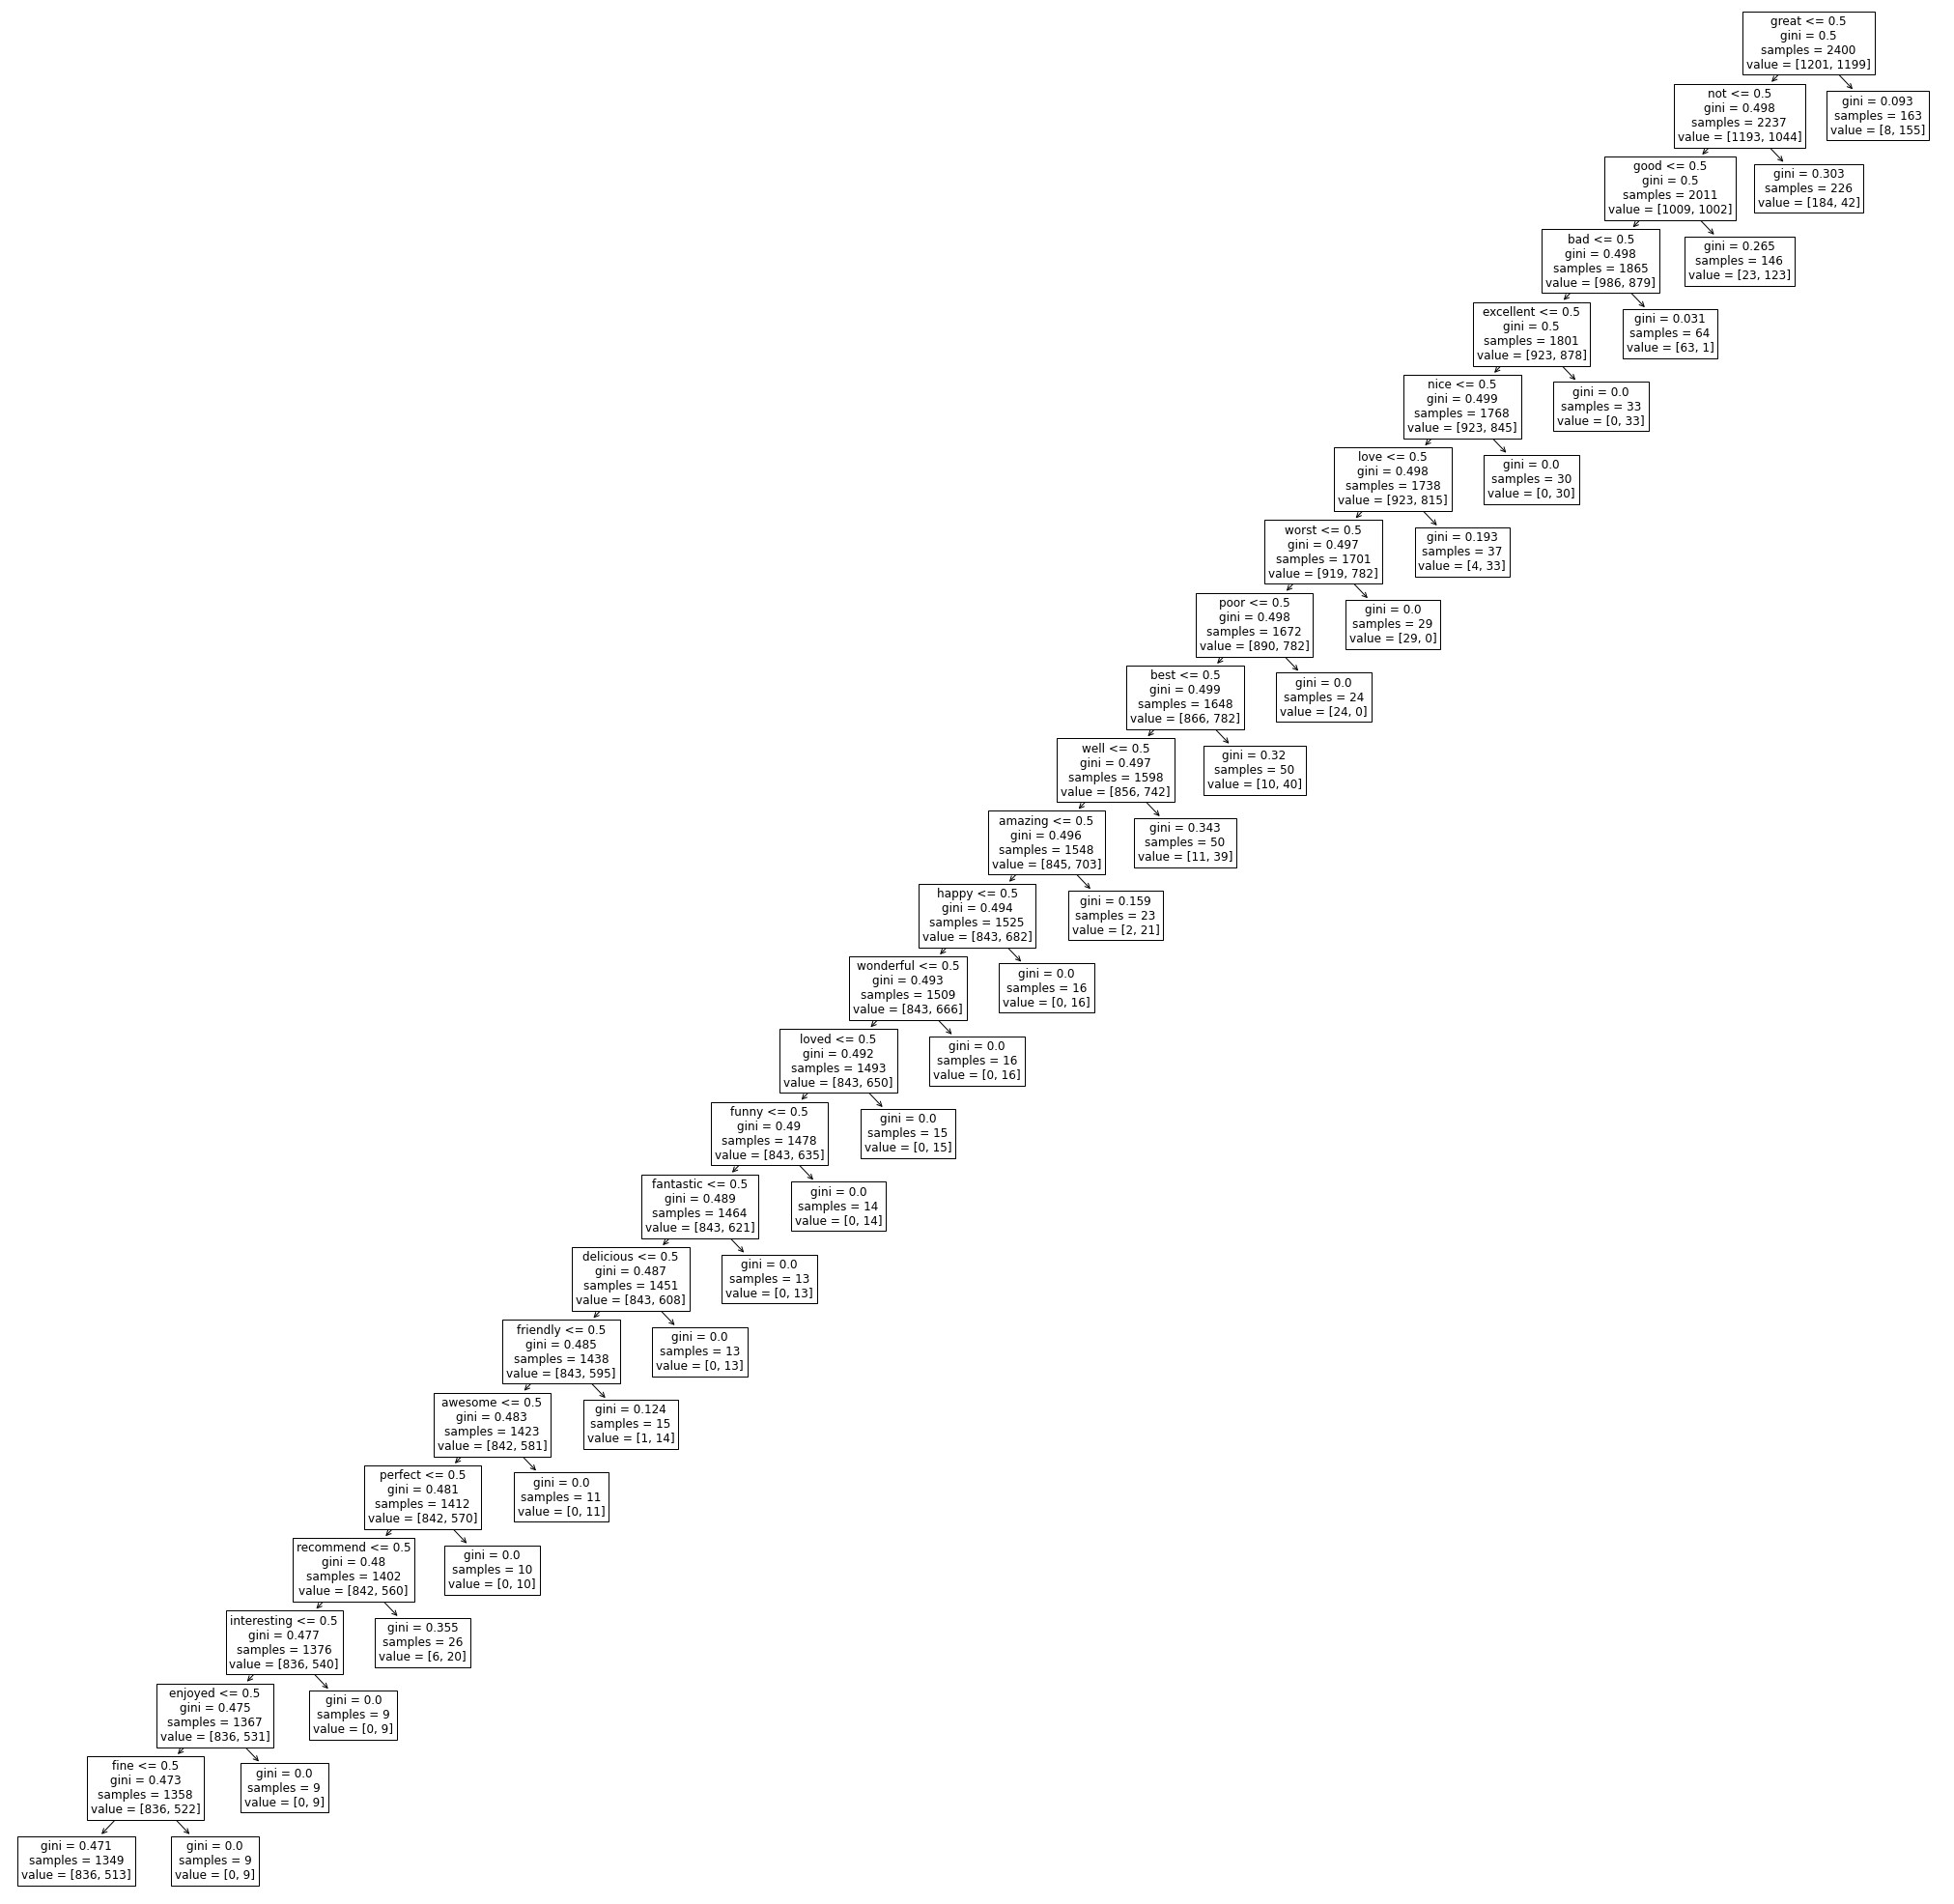

In [37]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
from sklearn.metrics import accuracy_score
from IPython.display import Image  
from sklearn.tree import export_graphviz


"""
- All lowercase
- words defined as alphanumerics separated by spaces
- punctuation is stripped
- took tokens occuring at least twice but not in more than 70% of documents
"""
# p = re.compile(r"[\w\d']+", re.I)
files = ['amazon_cells_labelled.txt','imdb_labelled.txt','yelp_labelled.txt']
sentences = []
labels = np.array([])
for file in files:
    curr_file = open("uci_3sources_sentiment_analysis/{}".format(file),"r")
    contents = curr_file.read()
    for each in contents.split('\n')[:-1]: 
        split = each.split('\t')
        # sent = split[0].lower()
        # sentences.append(re.findall(p, sent))
        sentences.append(split[0])
        labels = np.append(labels, (split[1]))

cv = CountVectorizer(encoding='utf-8', strip_accents=None, lowercase=True, 
preprocessor=None, tokenizer=None, stop_words=None, token_pattern=r"[\w\d']+",
max_df=0.7, min_df=2, max_features=None)

"""
5267 words without filtering
min word count 2: 2240
min word count 3: 1460
"""
cv = cv.fit(sentences)
print(len(cv.get_feature_names()))
X = cv.fit_transform(sentences)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.20, random_state=42)

benchmark_clf = dtc()
benchmark_clf.fit(X_train, y_train)
benchmark_clf.score(X_test, y_test)
"""
With the next piece of code, we tried to determine what the most suitable max_depth is
"""
# c_parameter_name = 'max_depth'
# c_parameter_values = [i*5 + 5 for i in range(int(500/5))]
# c_best_parameter = 0
# c_best_accuracy = 0
# c_worst_parameter = 0
# c_worst_accuracy = 100
# df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
# for input_parameter in c_parameter_values:
#     model = dtc(criterion='gini', splitter='best', max_depth=input_parameter, min_samples_split=2)
#     model.fit(X_train[:,5:], y_train)
#     y_pred = model.predict(X_test[:,5:])
#     acc_score = accuracy_score(y_test,y_pred)*100
#     df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
#     if acc_score > c_best_accuracy:
#             c_best_accuracy = acc_score
#             c_best_parameter = input_parameter
#             c_best_model = model
#     if acc_score < c_worst_accuracy:
#             c_worst_accuracy = acc_score
#             c_worst_parameter = input_parameter
#             c_worst_model = model
    
# print(df)
# print("")
# plt.figure(figsize=(12,6))
# sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
# title = 'Model-2 Accuracy(%) vs ' + c_parameter_name + ' parameter'
# plt.title(title)
# plt.xticks(rotation= 90)
# plt.grid()

#max_depth=70 seems to be the best depth to pick in the model

""" 
With the next piece of code, we tried to determine what the most suitable min_samples_split is
which appears to be 300
"""
# c_parameter_name = 'min_samples_split'                   
# c_parameter_values = [i*10 + 10 for i in range(int(500/10))]
# c_best_parameter = 0
# c_best_accuracy = 0
# c_worst_parameter = 0
# c_worst_accuracy = 100
# df = pd.DataFrame(columns=[c_parameter_name, 'accuracy'])
# for input_parameter in c_parameter_values:
#     model = dtc(max_depth=25, min_samples_split=input_parameter, random_state=21)
#     model.fit(X_train[:,5:], y_train)
#     y_pred = model.predict(X_test[:,5:])
#     acc_score = accuracy_score(y_test,y_pred)*100
#     df = df.append({c_parameter_name : input_parameter , 'accuracy' : acc_score}, ignore_index=True)
#     if acc_score > c_best_accuracy:
#             c_best_accuracy = acc_score
#             c_best_parameter = input_parameter
#             c_best_model = model
#     if acc_score < c_worst_accuracy:
#             c_worst_accuracy = acc_score
#             c_worst_parameter = input_parameter
#             c_worst_model = model
# print(df)
# print("")
# plt.figure(figsize=(12,6))
# sns.pointplot(x=c_parameter_name, y="accuracy", data=df)
# title = 'Model-3 Accuracy(%) vs ' + c_parameter_name + ' parameter'
# plt.title(title)
# plt.xticks(rotation= 90)
# plt.grid()

clf = dtc(criterion='gini', max_depth= 25, min_samples_split = 230)
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(36,36))
tree.plot_tree(clf, fontsize = 12, feature_names=cv.get_feature_names())
plt.show


In [ ]:
print(len(labels))

3000


In [ ]:
import pandas
df = pandas.read_csv('Airline-Sentiment-2-w-AA.csv', encoding="ISO-8859-1")

sentenceAir = df.loc[:,'text']
sentencesAirline = sentenceAir.values
print(sentencesAirline)

labelAir = df.loc[:,'airline_sentiment:confidence']
labelsAirline = labelAir.values
print(labelsAirline)

# import csv

# with open('Airline-Sentiment-2-w-AA.csv') as csv_file:
#     csv_reader = csv_file.read(csv_file, delimiter=',')
#     line_count = 0
#     for row in csv_reader:
#         if line_count == 0:
#             print(f'Column names are {", ".join(row)}')
#             line_count += 1
#         else:
#             print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
#             line_count += 1
#     print(f'Processed {line_count} lines.')

# sentences = []
# labels = np.array([])
# for each in contents.split('\n')[:-1]: 
#     split = each.split('\t')
#     # sent = split[0].lower()
#     # sentences.append(re.findall(p, sent))
#     sentences.append(split[15])
#     labels = np.append(labels, (split[15]))

# cv = CountVectorizer(encoding='utf-8', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, 
# stop_words=None, token_pattern=r"[\w\d']+", max_df=0.7, min_df=2, max_features=None)

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']
[1.     0.3486 0.6837 ... 1.     1.     0.6771]


In [ ]:
df1 = pandas.read_csv('datasetSentences.txt', delimiter="\t")
print(df1)

df2 = pandas.read_csv('sentiment_labels.txt', delimiter="|")
print(df2)

sentenceSST = df1.loc[:,'sentence']
sentencesSST = sentenceSST.values
print(sentencesSST)

labelSST = df2.loc[:,'sentiment values']
labels_SST = labelSST.values


labelsSST = labels_SST[:11855]
print(labelsSST.size)

       sentence_index                                           sentence
0                   1  The Rock is destined to be the 21st Century 's...
1                   2  The gorgeously elaborate continuation of `` Th...
2                   3                     Effective but too-tepid biopic
3                   4  If you sometimes like to go to the movies to h...
4                   5  Emerges as something rare , an issue movie tha...
...               ...                                                ...
11850           11851                                    A real snooze .
11851           11852                                     No surprises .
11852           11853  We 've seen the hippie-turned-yuppie plot befo...
11853           11854  Her fans walked out muttering words like `` ho...
11854           11855                                In this case zero .

[11855 rows x 2 columns]
        phrase ids  sentiment values
0                0           0.50000
1                1      

In [ ]:
from collections import defaultdict
from pathlib import Path
import pandas as df

my_dir_path = "neg"

results = defaultdict(list)
for file in Path(my_dir_path).iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
df3 = pd.DataFrame(results)
df3['label']=0
print(df3)


# import os, sys

# # Open a file
# path = "neg"
# dirs = os.listdir( path )


# # This would print all the files and directories
# for file in dirs:
#    print (file)
   


# files = ['amazon_cells_labelled.txt','imdb_labelled.txt','yelp_labelled.txt']
# sentences = []
# labels = np.array([])
# for file in files:
#     curr_file = open("uci_3sources_sentiment_analysis/{}".format(file),"r")
#     contents = curr_file.read()
#     for each in contents.split('\n')[:-1]: 
#         split = each.split('\t')
#         # sent = split[0].lower()
#         # sentences.append(re.findall(p, sent))
#         sentences.append(split[0])
#         labels = np.append(labels, (split[1]))


           file_name                                               text  label
0    cv396_19127.txt  adam sandler isn't known for appearing in deep...      0
1    cv137_17020.txt  the only thing worse than watching a bad movie...      0
2    cv687_22207.txt  an american werewolf in london is john landis'...      0
3     cv280_8651.txt  capsule : lesbianism examined in the same hush...      0
4    cv295_17060.txt  when i first saw the preview for cruel intenti...      0
..               ...                                                ...    ...
995  cv873_19937.txt  overblown remake of the 1963 robert wise film ...      0
996  cv231_11028.txt  by trying to satisfy every kind of viewer , it...      0
997  cv181_16083.txt  as with any gen-x mtv movie ( like last year's...      0
998  cv764_12701.txt  hav plenty , as we are told in the beginning a...      0
999  cv643_29282.txt  kids today , they don't just want to see heart...      0

[1000 rows x 3 columns]


In [ ]:
pathPos = "pos"

resultsPos = defaultdict(list)
for file in Path(pathPos).iterdir():
    with open(file, "r") as file_open:
        resultsPos["file_name"].append(file.name)
        resultsPos["text"].append(file_open.read())
df4 = pd.DataFrame(resultsPos)
df4['label']=1
print(df4)

           file_name                                               text  label
0     cv316_6370.txt  if he doesn=92t watch out , mel gibson is in d...      1
1    cv349_13507.txt  martin scorsese's kundun , which chronicles ro...      1
2     cv513_6923.txt  when i first heard that romeo & juliet had bee...      1
3    cv528_10822.txt  studio expectations must not have been high fo...      1
4     cv429_7439.txt  that thing you do ! , from first-time film dir...      1
..               ...                                                ...    ...
995   cv781_5262.txt  robocop is an intelligent science fiction thri...      1
996   cv507_9220.txt  capsule : side-splitting comedy that follows i...      1
997  cv050_11175.txt  national lampoon's animal house , made in 1978...      1
998  cv635_10022.txt  in one scene from " the people vs . \nlarry fl...      1
999   cv618_8974.txt  director david fincher has such an eye for det...      1

[1000 rows x 3 columns]


In [ ]:
#Merge dataframes
df_merged = pd.concat([df3, df4], ignore_index=True)

print(df_merged)


sentencePol = df_merged.loc[:,'text']
sentencesPol = sentencePol.values
print(sentencesPol)

labelPol = df_merged.loc[:,'label']
labelsPol = labelPol.values
print(labelsPol)

            file_name                                               text  \
0     cv396_19127.txt  adam sandler isn't known for appearing in deep...   
1     cv137_17020.txt  the only thing worse than watching a bad movie...   
2     cv687_22207.txt  an american werewolf in london is john landis'...   
3      cv280_8651.txt  capsule : lesbianism examined in the same hush...   
4     cv295_17060.txt  when i first saw the preview for cruel intenti...   
...               ...                                                ...   
1995   cv781_5262.txt  robocop is an intelligent science fiction thri...   
1996   cv507_9220.txt  capsule : side-splitting comedy that follows i...   
1997  cv050_11175.txt  national lampoon's animal house , made in 1978...   
1998  cv635_10022.txt  in one scene from " the people vs . \nlarry fl...   
1999   cv618_8974.txt  director david fincher has such an eye for det...   

      label  
0         0  
1         0  
2         0  
3         0  
4         0  
...

<function matplotlib.pyplot.show(close=None, block=None)>

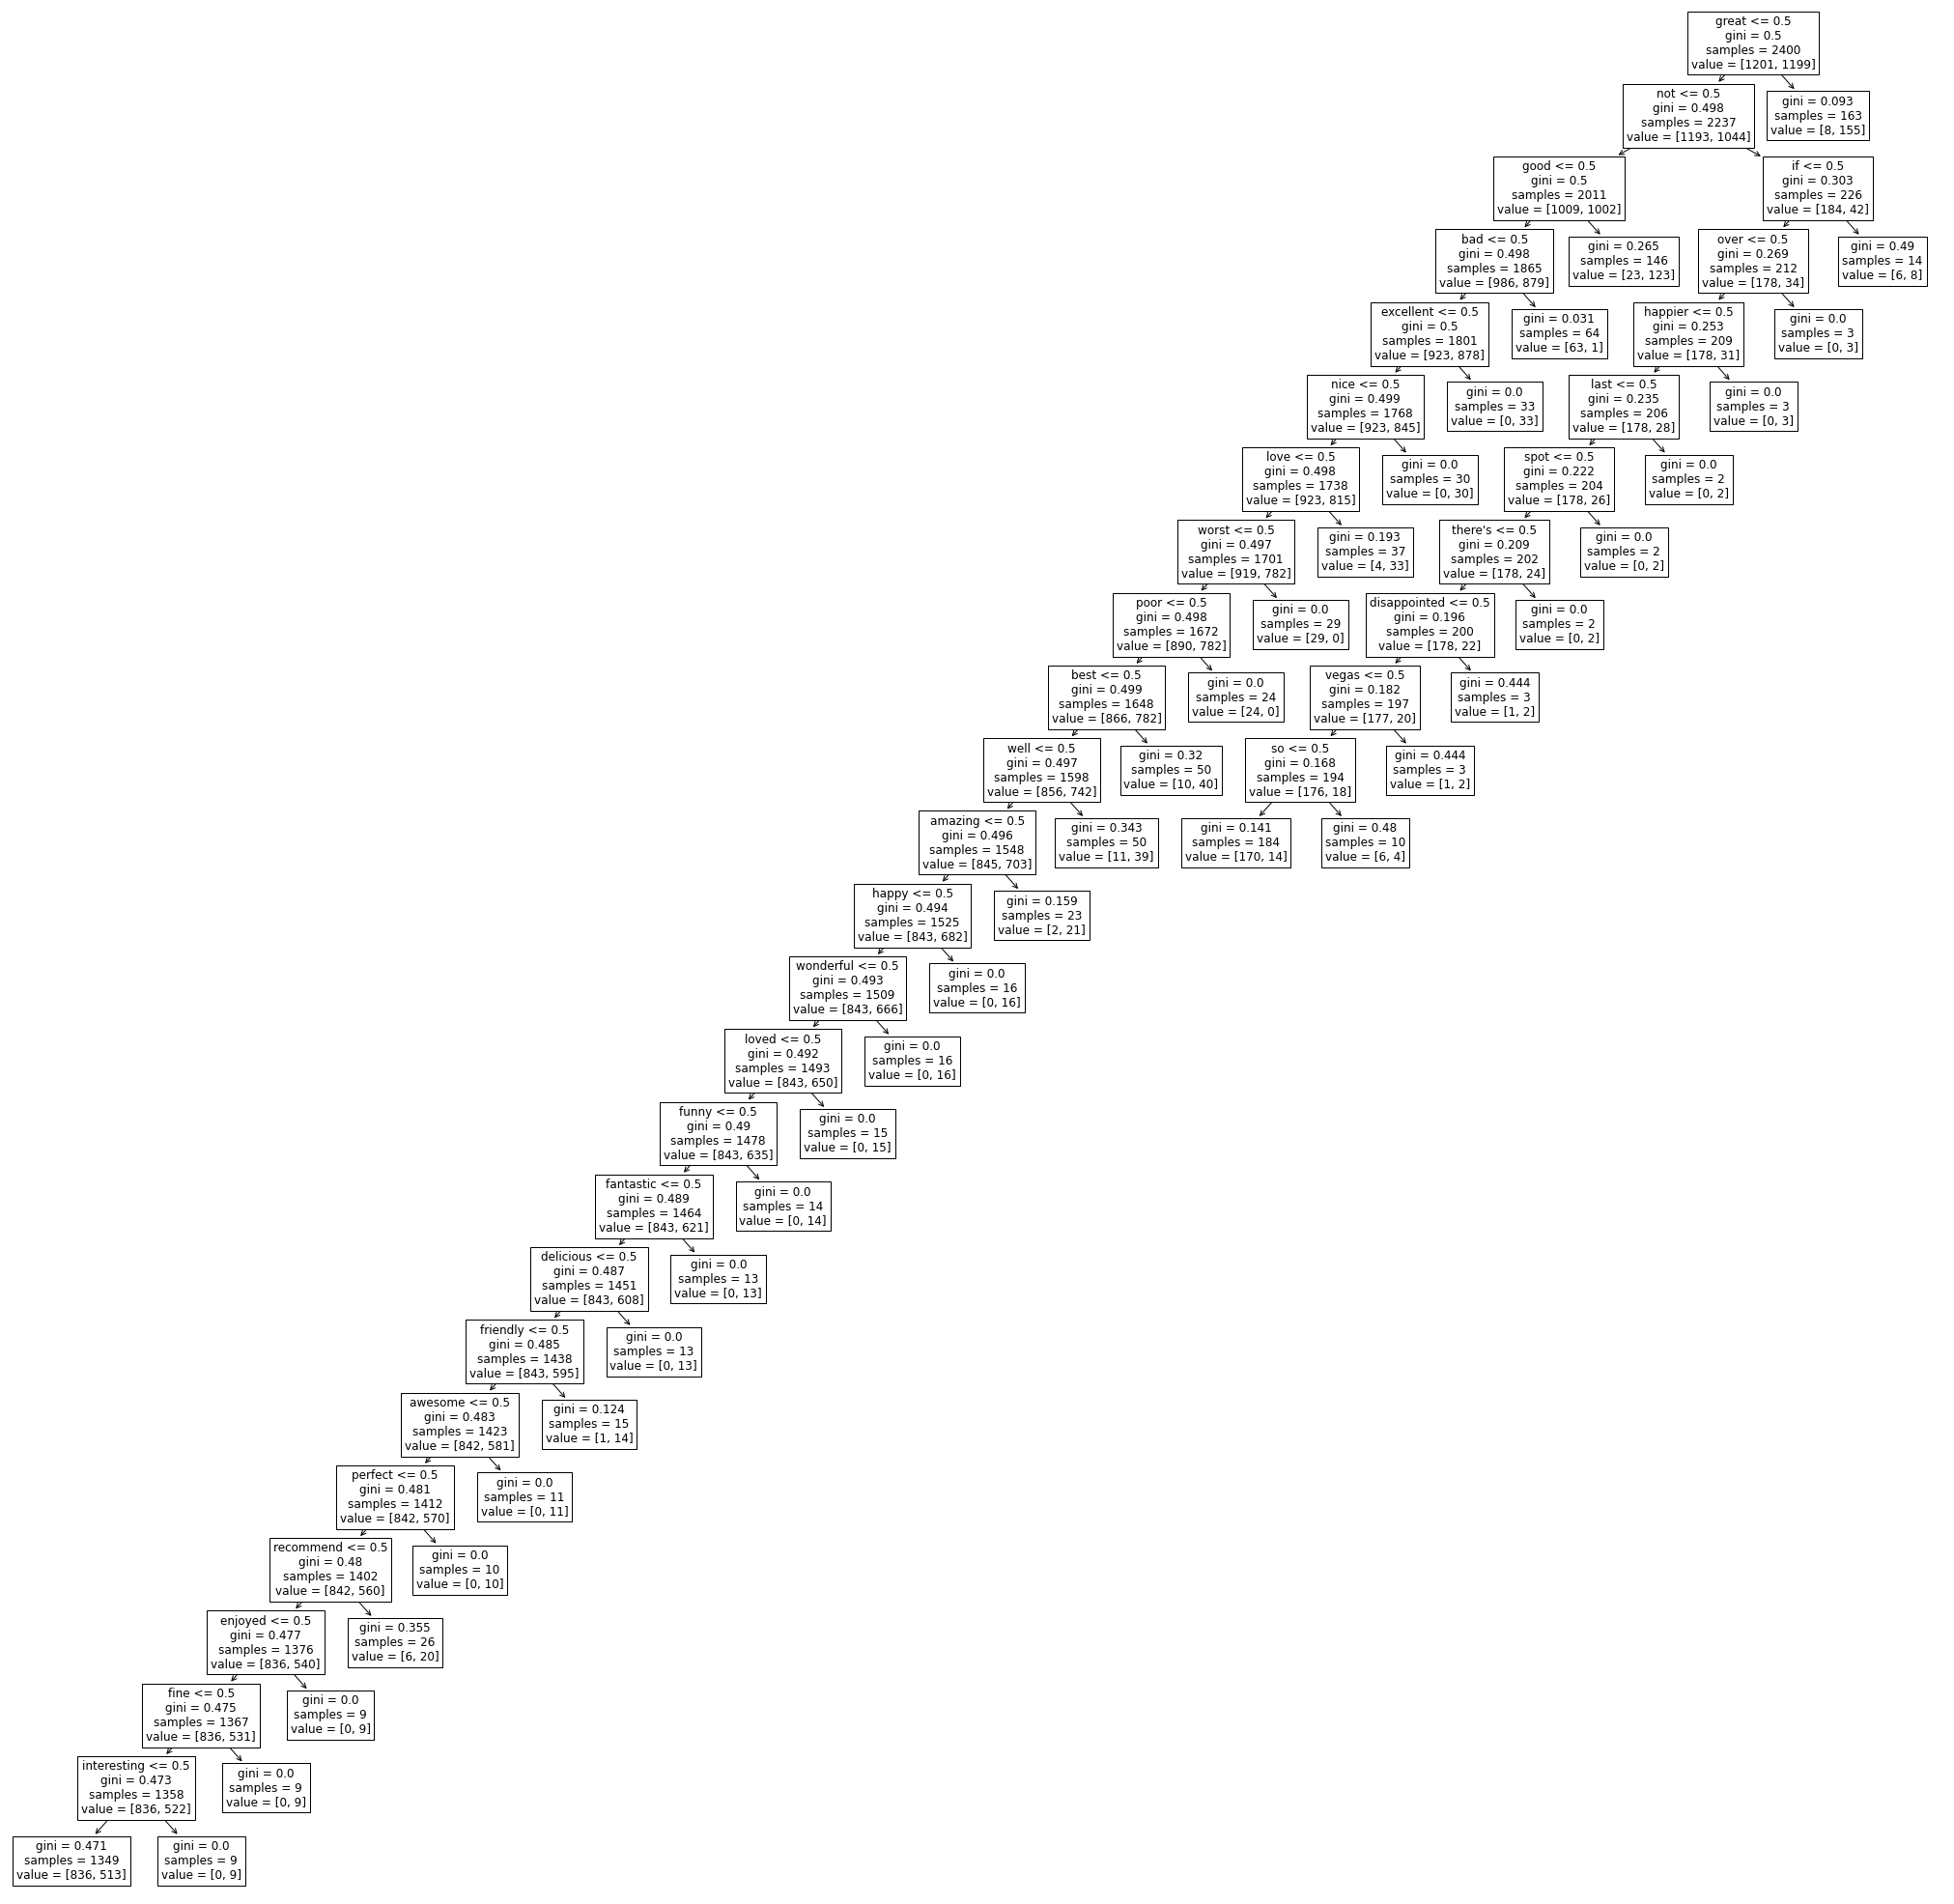

In [ ]:
clf = dtc(criterion='gini', max_depth= 25, min_samples_split = 190)
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(36,36))
tree.plot_tree(clf, fontsize = 12, feature_names=cv.get_feature_names())
plt.show

In [ ]:
import math
print(math.ceil(3451*.2))
print(3451*.2)

691
690.2


In [2]:
import random
import collections

class RandomForest:
    """
    param n_trees: int, default=100
        number of classifiers to ensemble
    
    param criterion: {'gini', 'entropy'}, default='gini'
        specifies purity function to use to make split decisions.

    param max_depth: 
    """

    def __init__(self, n_trees=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None,
        random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, max_samples=None):

        self.n_trees = n_trees
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.random_state = random_state
        self.max_leaf_nodes = max_leaf_nodes
        self.min_impurity_decrease = min_impurity_decrease
        self.min_impurity_split = min_impurity_split
        self.class_weight = class_weight
        self.max_samples = max_samples

        self.trees = None

    
    def fit(self, X, y):
        """
        param X:
        param y:
        """
        self.trees = []
        data_indices = list(range(X.shape[0]))

        if not self.max_samples:
            # max_samples == None
            self.max_samples = X.shape[0]
        elif self.max_samples <= 1.0:
            # max_samples is float 
            self.max_samples = X.shape[0]*self.max_samples
        else:
            # max_samples is int
            self.max_samples = self.max_samples if self.max_samples <= X.shape[0] else X.shape[0]

        random.seed(self.random_state)

        for n in range(self.n_trees):
            # fit n_trees to random bootstrap of data
            
            sample = random.sample(data_indices, self.max_samples)

            tree = dtc(criterion = self.criterion, max_depth = self.max_depth, min_samples_split = self.min_samples_split, 
                min_samples_leaf = self.min_samples_leaf, max_features = self.max_features, random_state = self.random_state,
                max_leaf_nodes = self.max_leaf_nodes, min_impurity_decrease = self.min_impurity_decrease, 
                min_impurity_split = self.min_impurity_split, 
                class_weight = self.class_weight).fit(X[sample], y[sample])

            self.trees.append(tree)

        return self


    def predict(self, X)->np.array:
        """
        param X:
        """
        forest_predictions = np.array([])

        for x in X:
            # get prediction for each X
            prediction_sum = 0

            for tree in self.trees:
                prediction_sum += int(tree.predict(x)[0])

            if prediction_sum / self.n_trees < 0.5:
                forest_predictions = np.append(forest_predictions, 0)
            else:
                forest_predictions = np.append(forest_predictions, 1)

        return forest_predictions


    def score(self, X, y):
        """
        param X:
        param y:
        """
        predictions = self.predict(X)
        score = 0

        for prediction, y_ in zip(predictions, y):
            if prediction == int(y_):
                score+=1

        return score/y.shape[0]
        

In [11]:
from sklearn.neighbors import NearestNeighbors

class RandomForest_knn(RandomForest):

    def __init__(self, n_trees=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None,
        random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, max_samples=None, k=0.01):

        super().__init__(n_trees, criterion, max_depth, min_samples_split, min_samples_leaf, max_features,
        random_state, max_leaf_nodes, min_impurity_decrease, min_impurity_split, class_weight, max_samples)
        
        self.knn = None
        self.data = None
        self.labels = None
 
        self.k = k

    def fit(self, X_train, y_train, metric='cosine', algorithm='auto'):
        """
        Constructs a K-nearest neighbors relationship.
        k is class attribute - assumes variable k will not be of significant benefit

        param X_train:
        param y_train:
        param metric: str, default 'cosine',
            metric used for evaluating neighbor distances. from sklearn.metrics
        param algorithm: str, default 'auto'
        """
        
        if type(self.k) == float:
            self.k = int(np.ceil(X_train.shape[0]*self.k))
        
        self.knn = NearestNeighbors(n_neighbors = self.k, metric = metric, algorithm=algorithm)
        self.knn.fit(X_train)
        self.labels = y_train
        self.data = X_train

        return self


    def predict(self, X):
        """
        param X: np.array
        """
        predictions = np.array([])
        for x in X:
            
            distances, indices = self.knn.kneighbors(x)

            X_train = self.data[indices[0]]
            y_train = self.labels[indices[0]]
            
            super().fit(X_train, y_train)
            pred = super().predict(x)[0]

            predictions = np.append(predictions, pred)

        return predictions


    def score(self, X, y):
        """
        param X:
        param y:
        """
        return super().score(X, y)
    

In [27]:
nn = NearestNeighbors(n_neighbors = 480, metric = 'cosine', algorithm='brute')
nn.fit(X_train)

nn2 = NearestNeighbors(n_neighbors = 480, algorithm='ball_tree')
nn2.fit(X_train)

/opt/venv/lib/python3.7/site-packages/sklearn/neighbors/_base.py:415: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


NearestNeighbors(algorithm='ball_tree', n_neighbors=480)

In [29]:
start = time.time()
distances, indices = nn2.kneighbors(X_test[1])
print(time.time()-start)

0.003197908401489258


In [30]:
start = time.time()
distances, indices = nn2.kneighbors(X_test[2])
print(time.time()-start)

0.0039327144622802734


In [22]:
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier as rfc

class RandomForest_skl_knn(rfc):

    def __init__(self, n_trees=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                 max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                 min_impurity_split=None, class_weight=None, max_samples=None, k=0.01, n_jobs=None):

        super().__init__(n_trees, criterion, max_depth, min_samples_split, min_samples_leaf, max_features,
        random_state, max_leaf_nodes, min_impurity_decrease, min_impurity_split, class_weight, max_samples,
                        n_jobs)
        
        self.knn = None
        self.data = None
        self.labels = None
 
        self.k = k

    def fit(self, X_train, y_train, metric='cosine'):
        """
        Constructs a K-nearest neighbors relationship.
        k is class attribute - assumes variable k will not be of significant benefit

        param X_train:
        param y_train:
        param metric: str, default 'cosine',
            metric used for evaluating neighbor distances. from sklearn.metrics
        """
        
        if type(self.k) == float:
            self.k = int(np.ceil(X_train.shape[0]*self.k))
        
        self.knn = NearestNeighbors(n_neighbors = self.k, metric = metric)
        self.knn.fit(X_train)
        self.labels = y_train
        self.data = X_train

        return self


    def predict(self, X):
        """
        param X: np.array
        """
        predictions = np.array([])
        for x in X:
            
            distances, indices = self.knn.kneighbors(x)

            X_train = self.data[indices[0]]
            y_train = self.labels[indices[0]]
            
            super().fit(X_train, y_train)
            pred = super().predict(x)[0]

            predictions = np.append(predictions, pred)

        return predictions


    def score(self, X, y):
        """
        param X:
        param y:
        """
        return super().score(X, y)
    

In [17]:
import time
start = time.time()
clf = RandomForest_knn(random_state=117)
clf.fit(X_train, y_train, metric = 'minkowski', algorithm='brute')
print(clf.knn)
print(clf.score(X_test, y_test))
#n_neighbors=600
#10 samples: 21 seconds, acc: 1.0 
#20 samples: 42 seconds, acc: 0.9
#30 samples: 61 seconds, acc: 0.9 

# about 20 seconds per additional 10 samples

#All samples: acc: 0.763
print(time.time() - start)
#ball_tree
# 0.6783333333333333
# 91.76371693611145

NearestNeighbors(algorithm='brute', n_neighbors=24)
0.6783333333333333
90.46058130264282


In [10]:
import sklearn

import sklearn
sorted(sklearn.neighbors.VALID_METRICS['kd_tree'])

['chebyshev',
 'cityblock',
 'euclidean',
 'infinity',
 'l1',
 'l2',
 'manhattan',
 'minkowski',
 'p']

In [ ]:
clf = RandomForest_knn(k=0.025)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.7283333333333334


In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
clf_sk = rfc()
clf_sk.fit(X_train, y_train)
print(clf_sk.score(X_test,y_test))

0.8033333333333333


In [ ]:
clf_rf = RandomForest()
clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_test,y_test))

0.795


In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedShuffleSplit
import time

# self, n_trees=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None,
#         random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, max_samples=None, k=0.2
params = {
    'n_trees':list(range(75,226,75)),
    'criterion':('gini','entropy'),
    'min_samples_split':[i/100 for i in range(1,101,20)],
    'min_samples_leaf':[i/100 for i in range(1,101,20)],
    'max_features':[0.1,0.5,1.0,'sqrt','log2'],
    'min_impurity_decrease':[i/100 for i in range(0,101,20)],
    'min_impurity_split':[i/100 for i in range(0,101,20)],
    'k':[i/100 for i in range(5,101,10)]
}

rf_knn = RandomForest_knn()

# GridSearchCV, basically.
# clf = GridSearchCV(rf_knn, params)
# clf.fit(X_train, y_train)

sss = StratifiedShuffleSplit(n_splits = 3, random_state=117, test_size=0.2)

accuracies = []

start_time = time.time()

for n_trees in params['n_trees']:
    for criterion in params['criterion']:
        for min_samples_split in params['min_samples_split']:
            for min_samples_leaf in params['min_samples_leaf']:
                for max_features in params['max_features']:
                    for min_impurity_decrease in params['min_impurity_decrease']:
                        for k in params['k']:

                            for train_i, test_i in sss.split(X_train, y_train):
                                sX_train, sX_test = X_train[train_i], X_train[test_i]
                                sy_train, sy_test = y_train[train_i], y_train[test_i]

                                rf_knn = RandomForest_knn(n_trees=n_trees, criterion=criterion, min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf, max_features=max_features, min_impurity_decrease=min_impurity_decrease, 
                                k=k)

                                rf_knn.fit(sX_train, sy_train)
                                acc = rf_knn.score(sX_test, sy_test)

                                accuracies.append(
                                (acc, 
                                {'n_trees':n_trees, 'criterion':criterion,'min_samples_split':min_samples_split,
                                'min_samples_leaf':min_samples_leaf,'max_features':max_features,'min_impurity_decrease':min_impurity_decrease,
                                'k':k}
                                ) 
                                )

                            print(("Finished evaluating params for k={} "
                                  "mid={}, mf={}, msl={}, mss={}, crit={},n_trees={}, \n scored at {}"
                                  "").format(k,min_impurity_decrease,max_features,min_samples_leaf,min_samples_split,
                                          criterion,n_trees,acc))

    print("+-=+-=+-=+-=Completed testing for {} many trees+-=+-=+-=".format(n_trees))
    print("Max score found: {}".format(max(accuracies)))

end_time = time.time()


Finished evaluating params for k=0.05 mid=0.0, mf=0.1, msl=0.01, mss=0.01, crit=gini,n_trees=75, 
 scored at 0.7375
Finished evaluating params for k=0.15 mid=0.0, mf=0.1, msl=0.01, mss=0.01, crit=gini,n_trees=75, 
 scored at 0.7479166666666667
Finished evaluating params for k=0.25 mid=0.0, mf=0.1, msl=0.01, mss=0.01, crit=gini,n_trees=75, 
 scored at 0.74375
Finished evaluating params for k=0.35 mid=0.0, mf=0.1, msl=0.01, mss=0.01, crit=gini,n_trees=75, 
 scored at 0.7291666666666666
Finished evaluating params for k=0.45 mid=0.0, mf=0.1, msl=0.01, mss=0.01, crit=gini,n_trees=75, 
 scored at 0.73125


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedShuffleSplit
import time

# self, n_trees=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None,
#         random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, max_samples=None, k=0.2
params = {
    'n_trees':list(range(75,226,75)),
    'criterion':('gini','entropy'),
    'min_samples_split':[i/100 for i in range(1,101,20)],
    'min_samples_leaf':[i/100 for i in range(1,101,20)],
    'max_features':[0.1,0.5,1.0,'sqrt','log2'],
    'min_impurity_decrease':[i/100 for i in range(0,101,20)],
    'min_impurity_split':[i/100 for i in range(0,101,20)],
    'k':[i/1000 for i in range(1,201,10)]
}

rf_knn = RandomForest_knn()

# GridSearchCV, basically.
# clf = GridSearchCV(rf_knn, params)
# clf.fit(X_train, y_train)

sss = StratifiedShuffleSplit(n_splits = 3, random_state=117, test_size=0.2)

accuracies = []

start_time = time.time()

for n_trees in params['n_trees']:
    for criterion in params['criterion']:
        for min_samples_split in params['min_samples_split']:
            for min_samples_leaf in params['min_samples_leaf']:
                for max_features in params['max_features']:
                    for min_impurity_decrease in params['min_impurity_decrease']:
                        for k in params['k']:
                            this_clf_time = time.time()
                            for train_i, test_i in sss.split(X_train, y_train):
                                sX_train, sX_test = X_train[train_i], X_train[test_i]
                                sy_train, sy_test = y_train[train_i], y_train[test_i]

                                rf_knn = RandomForest_knn(n_trees=n_trees, criterion=criterion, min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf, max_features=max_features, min_impurity_decrease=min_impurity_decrease, 
                                k=k)

                                rf_knn.fit(sX_train, sy_train)
                                acc = rf_knn.score(sX_test, sy_test)

                                accuracies.append(
                                (acc, 
                                {'n_trees':n_trees, 'criterion':criterion,'min_samples_split':min_samples_split,
                                'min_samples_leaf':min_samples_leaf,'max_features':max_features,'min_impurity_decrease':min_impurity_decrease,
                                'k':k}
                                ) 
                                )

                            print(("Finished evaluating params for k={} "
                                  "mid={}, mf={}, msl={}, mss={}, crit={},n_trees={}, \n scored at {}"
                                  "").format(k,min_impurity_decrease,max_features,min_samples_leaf,min_samples_split,
                                          criterion,n_trees,acc))
                            
                            print("time elapsed: {}".format(time.time() - this_clf_time))

    print("+-=+-=+-=+-=Completed testing for {} many trees+-=+-=+-=".format(n_trees))
    print("Max score found: {}".format(max(accuracies)))

end_time = time.time()


In [ ]:
import time
from random import choice
from copy import deepcopy

class SA_Directional:
    """
    Implementation of greedy directional simulated annealing (SA).
    
    Used for hyperparameter tuning of models with high evaluation time,
    for which traditional SA, random processes, and grid search are
    more or less intractable. 
    
    Given an estimator and the parameters you wish to optimize on (as
    well as their search domains), returns the parameter selection
    which resulted in greatest model performance.
    
    When a parameter selection results in improved model performance,
    this improvement is seized upon greedily; rather than selecting a
    new random paremeter after each improvement, the algorithm makes
    a random choice that is bounded in the direction that improvement
    occured (e.g., if increasing a parameter lead to a good outcome in
    iteration n, only random selections of that parameter in the
    positive direction will be allowed in iteration n+1). If the
    selection in iteration n+1 is rejected, the algorithm returns to
    standard simulated annealing procedure. In this way, the algorithm
    alternates between standard simulated annealing and greedy hill
    climbing.
    
    If the search domain of the variable selected for directional 
    alteration does not have clear directions, e.g., if it is nominal
    or is numerical but already at the limits of its range, the
    algorithm returns to simulated annealing procedure and makes a new
    random hyperparameter selection.
    
    Basis for simulated annealing comes from description given by
    https://santhoshhari.github.io/simulated_annealing/
    """
    def __init__(self, Estimator, params, temp=1.0, temp_velocity=.9, 
                 beta=1, temp_cutoff=0.00001):
        """
        param Estimator: a model class with a fit and score function
        param params: dict,
            maps model's parameters to their search domain.
        param init_temp: int or float,
            initial temperature
        param temp_velocity: float [0,1.0],
            factor by which temperature scales down after temp_iter iterations
        param temp: int,
            number of iterations after which temperature is altered
        param beta: int or float,
            normalizing constant. Increasing beta results in higher
            probability of rejecting candidates.
        """
        self.Estimator = Estimator
        self.params = params
        self.temp = temp
        self.temp_velocity = temp_velocity
        self.beta = beta
        self.temp_cutoff = temp_cutoff
        
        self.best_estimator = None
        
    
    def isAccepted(self, current_eval, candidate_eval)->bool:
        """
        Assumes maximization: higher score is better.
        
        param current_eval: last accepted model iteration
        param candidate_eval: candidate model's evaluation score
        """
        p_accept = np.exp(self.beta*(candidate_eval-current_eval)/(self.temp))
        
        print()
        print("Current_eval: {}; Candidate_eval: {}".format(current_eval, candidate_eval))
        print("Current temperature: {}".format(self.temp))
        print("Acceptance probability: {}".format(p_accept))
        print()
        self.temp = self.temp*self.temp_velocity
        
        return p_accept > np.random.uniform(low=0.0, high=1.0)
    
    
    def isNumeric(self, arr)->bool:
        """
        arr: list of possible values for a parameter
        returns True if all elems of array are numeric
        """
        return np.all(np.array([(type(i)==int or type(i)==float) for i in arr]))
    
    
    def getNewDomain(self, arr, comparator)->np.array:
        """
        Checks if arr is numeric. If it is, returns subset of arr satisfying comparator (may be empty if
        old_value at extremes of the range of arr). If not, return empty array.
        """
        if self.isNumeric(arr):
            new_domain = np.array([i for i in arr if comparator(i)])
        else:
            new_domain = np.array([])
            
        return new_domain
    
    
    def updateRandomly(self, current_params:dict, history:list, avoid_variable=None, loop_limit=100):
        """
        Returns a random parameter set with one updated value that has not been seen in the
        history.
        Raises an exception of loop_limit-many updates are attempted.
        
        param current_params: dictionary containing parameters for model
        param history: history of past parameter maps
        param avoid_variable: variable to avoid selecting.
        param loop_limit: update limit for selecting new states.
        """
        choices = list(current_params.keys())
        
        if avoid_variable:
            choices.remove(avoid_variable)
        
        candidate_params = deepcopy(current_params)
        reassignments = 0
        
        while candidate_params in history and reassignments < loop_limit:
            candidate_params = deepcopy(current_params)
            new_variable = choice(choices)
            old_value = current_params[new_variable]
            candidate_params[new_variable] = choice(self.params[new_variable])
            reassignments+=1
            
        if reassignments >= loop_limit:
            raise Exception("loop limit exhausted during state update phase.")
            
        return (new_variable, old_value, candidate_params)
        
        
    def printCandidateState(self, current_params, candidate_eval, new_variable="No modification")->None:
        """
        param current_state: dict
        param candidate_eval: current evaluation score of candidate
        """
        print(current_params)
        print("Modified variable: {}".format(new_variable))
        print("Above model evaluated with score of {}.".format(candidate_eval))
        print()
        return None
    
    
    def fit(self, X_train, X_test, y_train, y_test, rejection_streak_limit=3,
            max_runtime=21600):
        """
        Applies directional SA algorithm as follows:
        
        1. Randomly initialize all hyperparameters (hp's), treat this as 
        current state, and evaluate model performance.
        
        2. Either randomly select one hp and randomly update its value,
        or, if the previous iteration resulted in better performance,
        select the previously altered variable and increment it
        randomly in the direction of previous change. (If the latter is
        not possible, return to standard procedure and make a new
        random hp selection).
        
        3. If the combination has already been visited, return to step 2.
        
        4. Evaluate estimator performance on the state derived in 2.
        
        5. Accept or reject new state based on product of 
        temperature conditions and performance difference from
        previous state.
        
        6. Repeat 2 though 5 until max_runtime reached or until
        no model is accepted after rejection_streak_limit many
        rejections are made
        
        
        param X_train
        param y_train
        param X_test
        param y_test
        param rejection_streak_limit: int,
            end tuning and return current state after this many 
            candidate rejections in a row have occured.
        param max_runtime: int, default 21600 seconds (6 hours),
            time (in seconds) after which fitting will end and the current
            best model will be returned.
        
        returns best estimator found via directional SA
        """
        start_time = time.time()        
        
        print("Beginning execution at {} epoch time".format(start_time))
        
        param_history = []
        current_params = {k:choice(v) for k,v in self.params.items()}
        
        current_state = self.Estimator(**current_params)
        current_state.fit(X_train, y_train)
        current_eval = current_state.score(X_test, y_test)
        
        self.printCandidateState(current_params, current_eval)
        
        param_history.append(current_params)
            
        rejection_streak = 0
        
        # make first random variable selection
        new_variable, old_value, current_params = self.updateRandomly(current_params, param_history)
        
        current_time = time.time()
        
        while (rejection_streak < rejection_streak_limit) and (current_time - start_time < max_runtime) and (self.temp > self.temp_cutoff):
            
            candidate_state = self.Estimator(**current_params)
            candidate_state.fit(X_train, y_train)
            candidate_eval = candidate_state.score(X_test, y_test)
            
            param_history.append(current_params)
            
            self.printCandidateState(current_params, candidate_eval, new_variable)
                
            is_improvement = candidate_eval > current_eval
            accepted = self.isAccepted(current_eval, candidate_eval)
            
            if accepted:
                print("State accepted")
                print()
                current_state = candidate_state
                current_eval = candidate_eval
                rejection_streak = -1
            else:
                print("State rejected")
                print()
            
            if is_improvement and accepted:
                if current_params[new_variable] > old_value:
                    domain = self.getNewDomain(self.params[new_variable], lambda x: x > current_params[new_variable])
                else:
                    domain = self.getNewDomain(self.params[new_variable], lambda x: x < current_params[new_variable])
                    
                if domain.size == 0:
                    new_variable, old_value, current_params = self.updateRandomly(current_params,
                                                                                  param_history,
                                                                                   avoid_variable=new_variable)
                else:
                    current_params[new_variable] = choice(domain)
                        
            else:
                print("no improvement or rejected")
                new_variable, old_value, current_params = self.updateRandomly(current_params,
                                                                                     param_history)
            
              
            
            rejection_streak += 1
            current_time = time.time()
            
            print("-"*30)
            
        self.best_estimator = current_state
        
        
        return current_state, current_eval
            
        

In [ ]:
"""
SA_Directional Future Work:

Add "recent_variables queue, so that variables which have recently been explored are not explored again"
Or, add weights to variable exploration selection, all weights starting equally and then decreasing
as selections make improvements or not.

Explore multiple variables simulateneously and, if and increase is achieved, set each one incremenetally until
all are explored.
"""

# params = {
#     'n_trees':list(range(75,226)),
#     'criterion':('gini','entropy'),
#     'min_samples_split':[i/1000 for i in range(1,501,1)],
#     'min_samples_leaf':[i/1000 for i in range(1,501,1)],
#     'max_features':[0.1,0.5,1.0,'sqrt','log2'],
#     'min_impurity_decrease':[i/1000 for i in range(0,501,1)],
#     'k':[i/10000 for i in range(1,1000,1)]
# }

params = {
    'min_samples_split':[i/1000 for i in range(1,501,1)],
    'min_samples_leaf':[i/1000 for i in range(1,501,1)],
    'min_impurity_decrease':[i/1000 for i in range(0,501,1)],
    'k':[i/10000 for i in range(1,1000,1)]
}
# restricting k domain given findings from study.

sa = SA_Directional(RandomForest_knn, params, temp=1.0)
sa.fit(X_train, X_test, y_train, y_test, rejection_streak_limit=5)

In [ ]:
clf = RandomForest_knn(random_state=117)
clf.fit(X_train, y_train)
print(clf.knn)
print(clf.score(X_test, y_test))
#n_neighbors = 3
#30 samples: 3 seconds, acc: 0.77

NearestNeighbors(metric='cosine', n_neighbors=24)
0.72


In [ ]:
clf.trees[0].get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=117)>

In [31]:
clf = RandomForest(random_state=117)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
#10 samples: 11 seconds, acc: 0.7
#20 samples: 11 seconds, acc: 0.8
#30 samples: 11 seconds, acc: 0.83


0.7733333333333333

In [32]:
from sklearn.ensemble import RandomForestClassifier as rfc
clf_sk = rfc()
clf_sk.fit(X_train, y_train)
print(clf_sk.score(X_test,y_test))

0.8216666666666667


In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh.kneighbors(X_test[0].toarray())

(array([[0.        , 1.41421356, 1.41421356, 2.        , 2.23606798]]),
 array([[ 419,  768, 1488,  418,  967]]))

In [ ]:
X_test[:10]

<10x2240 sparse matrix of type '<class 'numpy.int64'>'
	with 104 stored elements in Compressed Sparse Row format>

In [ ]:
# cv1 = CountVectorizer(encoding='utf-8', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, 
# stop_words=None, token_pattern=r"[\w\d']+", max_df=0.7, min_df=2, max_features=None)

# """
# 5267 words without filtering
# min word count 2: 2240
# min word count 3: 1460
# """
# cv1 = cv1.fit(sentencesAirline)
# print(len(cv1.get_feature_names()))
# X = cv1.fit_transform(sentencesAirline)
# X_train, X_test, y_train, y_test = train_test_split(X, labelsAirline, test_size=0.20, random_state=42)
# y_train = np.array([1 if i>0.5 else 0 for i in y_train])
# y_test = np.array([1 if i>0.5 else 0 for i in y_test])
# benchmark_clf = rfc()
# benchmark_clf.fit(X_train, y_train)
# benchmark_clf.score(X_test, y_test)

6611


0.9870218579234973

In [ ]:
cv_SST = CountVectorizer(encoding='utf-8', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, 
stop_words=None, token_pattern=r"[\w\d']+", max_df=0.7, min_df=2, max_features=None)

cv_SST = cv_SST.fit(sentencesSST)
print(len(cv_SST.get_feature_names()))
XSST = cv_SST.fit_transform(sentencesSST)
X_trainSST, X_testSST, y_trainSST, y_testSST = train_test_split(XSST, labelsSST, test_size=0.20, random_state=42)

categorizeLabels = lambda y: np.array(['Very Negative' if i < 0.2 else 'Negative' if i < 0.4 else 'Neutral' if i < 0.6 else 'Positive' if i < 0.8 else 'Very Positive' for i in y])
categorize3Labels = lambda y: np.array(['Negative' if i < 0.4 else 'Neutral' if i < 0.6 else 'Positive' for i in y])
categorize2Labels = lambda y: np.array([0 if i < 0.5 else 1 for i in y])

y_trainSST = categorize2Labels(y_trainSST)
y_testSST = categorize2Labels(y_testSST)

benchmark_clf = rfc()
benchmark_clf.fit(X_trainSST, y_trainSST)
print(benchmark_clf.score(X_testSST, y_testSST))

# """
# 0.0-0.2 Very Negative
# 0.2-0.4 Negative
# 0.4-0.6 Neutral
# 0.6-0.8 Positive
# 0.8-1.0 Very Positive
# """
# >>> l = [1, 2, 3, 4, 5]
# >>> ['yes' if v == 1 else 'no' if v == 2 else 'idle' for v in l]

9949
0.6229439055250949


In [ ]:
benchmark_clf.score(X_testSST, y_testSST)

0.5166596372838465

In [ ]:
labelsSST

array([0.5    , 0.5    , 0.44444, ..., 0.61111, 0.72222, 0.5    ])

In [ ]:
XSST

<11855x9949 sparse matrix of type '<class 'numpy.int64'>'
	with 184012 stored elements in Compressed Sparse Row format>

In [ ]:
clf = RandomForest_knn(random_state=117)
clf.fit(X_trainSST[0:800],y_trainSST[0:800])
print(clf.score(X_testSST[801:1000],y_testSST[801:1000]))

0.507537688442211


In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
clf_sk = rfc()
clf_sk.fit(X_trainSST[0:800],y_trainSST[0:800])
print(clf_sk.score(X_testSST[801:1000],y_testSST[801:1000]))

0.5527638190954773


In [ ]:
clf_rf = RandomForest()
clf_rf.fit(X_trainSST[0:800],y_trainSST[0:800])
print(clf_rf.score(X_testSST[801:1000],y_testSST[801:1000]))

0.5326633165829145


In [ ]:
cv_Pol = CountVectorizer(encoding='utf-8', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, 
stop_words=None, token_pattern=r"[\w\d']+", max_df=0.7, min_df=2, max_features=None)

cv_Pol = cv_Pol.fit(sentencesPol)
print(len(cv_Pol.get_feature_names()))
XPol = cv_Pol.fit_transform(sentencesPol)
X_trainPol, X_testPol, y_trainPol, y_testPol = train_test_split(XPol, labelsPol, test_size=0.20, random_state=42)

y_trainPol = categorize2Labels(y_trainPol)
y_testSST = categorize2Labels(y_testPol)

benchmark_clf = rfc()
benchmark_clf.fit(X_trainPol, y_trainPol)
print(benchmark_clf.score(X_testPol, y_testPol))


25277
0.8225


In [ ]:
clf = RandomForest_knn(random_state=117)
clf.fit(X_trainPol,y_trainPol)
print(clf.score(X_testPol,y_testPol))

0.6375


In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
clf_sk = rfc()
clf_sk.fit(X_trainPol, y_trainPol)
print(clf_sk.score(X_testPol,y_testPol))

0.8275


In [ ]:
clf_rf = RandomForest()
clf_rf.fit(X_trainPol, y_trainPol)
print(clf_rf.score(X_testPol,y_testPol))

0.6225
